# Male Female Classification Project

# Import Labraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, optimizers, models

# Load Data

In [2]:
data_path="E:/Study DATA/Deep learning Projects/Male Female Classification Project/Dataset"

In [3]:
train_data_path=os.path.join(data_path, 'Train Data')
val_data_path=os.path.join(data_path, 'Validation Data')
test_data_path=os.path.join(data_path, "Test Data")

In [4]:
names=os.listdir(train_data_path)
names

['Female', 'Male']

In [5]:
def total_img(path,names):
    count=0
    for name in names:
        size=len(os.listdir(os.path.join(path, name)))
        count+=size
    return count

In [6]:
print("Total Training Images: ", total_img(train_data_path, names))
print("Total Validation Images: ", total_img(val_data_path, names))
print("Total Test Images: ", total_img(test_data_path, names))

Total Training Images:  2870
Total Validation Images:  500
Total Test Images:  228


# Data preprocessing

# 1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval.

### ImageDataGenerator tool do all the above image preprocessing steps

# Using ImageDataGenerator to read images from directories

In [10]:
datagenerator=ImageDataGenerator(rescale=1./255)

In [11]:
train_gen= datagenerator.flow_from_directory(
                                              train_data_path,
                                              batch_size=35,
                                              target_size=(94,94),
                                              class_mode='binary'
                                            )

Found 2870 images belonging to 2 classes.


In [12]:
val_gen= datagenerator.flow_from_directory(
                                            val_data_path,
                                            target_size=(94,94),
                                            batch_size=20,
                                            class_mode='binary'
                                        )

Found 500 images belonging to 2 classes.


In [13]:
labels=train_gen.class_indices
labels

{'Female': 0, 'Male': 1}

# Creating Network Architecture

In [14]:
model=models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(94,94,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 92, 92, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 64)      

In [16]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callback

In [15]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("val_accuracy") is not None and logs.get('val_accuracy')>=0.9500:
            print("\n Reached 95 val accuracy so cancelling training")
            self.model.stop_training=True

callbacks=mycallback()

# 2nd Callback
#from tensorflow.keras.callbacks import ModelCheckPoint
#model_save_path="E:/Study DATA/Deep learning Projects/Cotton Plant Disease Prediction"
#checkpoint=ModelCheckPoint(model_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max' )

# Training

In [17]:
history=model.fit(train_gen, steps_per_epoch=82, epochs=50, validation_data=val_gen, validation_steps=25)

Epoch 1/50
82/82 [==============================] - 86s 1s/step - loss: 0.6912 - accuracy: 0.5181 - val_loss: 0.6892 - val_accuracy: 0.6320
Epoch 2/50
82/82 [==============================] - 33s 409ms/step - loss: 0.6840 - accuracy: 0.5568 - val_loss: 0.6741 - val_accuracy: 0.6940
Epoch 3/50
82/82 [==============================] - 34s 414ms/step - loss: 0.6504 - accuracy: 0.6324 - val_loss: 0.6338 - val_accuracy: 0.6160
Epoch 4/50
82/82 [==============================] - 34s 412ms/step - loss: 0.5941 - accuracy: 0.6990 - val_loss: 0.5680 - val_accuracy: 0.7160
Epoch 5/50
82/82 [==============================] - 34s 413ms/step - loss: 0.5421 - accuracy: 0.7418 - val_loss: 0.5268 - val_accuracy: 0.7680
Epoch 6/50
82/82 [==============================] - 34s 410ms/step - loss: 0.4972 - accuracy: 0.7686 - val_loss: 0.5020 - val_accuracy: 0.7740
Epoch 7/50
82/82 [==============================] - 35s 428ms/step - loss: 0.4581 - accuracy: 0.7927 - val_loss: 0.4555 - val_accuracy: 0.8040
Ep

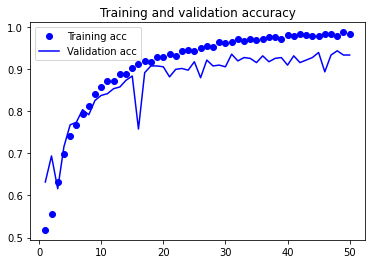

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

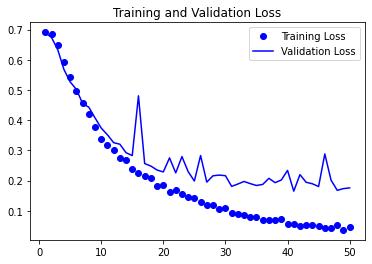

In [19]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss" )
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [20]:
model.save("E:/Study DATA/Deep learning Projects/Male Female Classification Project/Male Female Classification Updated Model.h5")

In [21]:
testdatagen=ImageDataGenerator(rescale=1./255)

In [22]:
test_generator=testdatagen.flow_from_directory(
                                            test_data_path,
                                            batch_size=6,
                                            target_size=(94,94),
                                            class_mode='binary'
                                            )

Found 228 images belonging to 2 classes.


In [23]:
loss,acc= model.evaluate(test_generator)

38/38 [==============================] - 6s 162ms/step - loss: 0.1852 - accuracy: 0.9605


In [24]:
print("Test Data Loss: ",loss)
print("Test Data Accuracy: ",acc)

Test Data Loss:  0.18515488505363464
Test Data Accuracy:  0.9605262875556946
